In [1]:
import axelrod as axl

In [3]:
import pandas as pd

from keras.models import load_model

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import (
    LSTM,
    Bidirectional,
    CuDNNLSTM,
    Dense,
    Dropout,
    RepeatVector,
    TimeDistributed,
)

In [8]:
from keras.layers.embeddings import Embedding

**Padded classification**

In [9]:
num_cells = 100
drop_out_rate = 0.2

top_words = 3
embedding_vector_length = 1
max_length = 204

In [11]:
model = Sequential()

model.add(
    Embedding(top_words, embedding_vector_length, input_length=max_length)
)
model.add(Bidirectional(LSTM(num_cells)))

model.add(Dropout(rate=drop_out_rate))
model.add(Dense(1, activation="sigmoid"))

model.load_weights('hawk_output/output_padded/final_lstm_model_5.h5')

model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)

In [12]:
input_lenght = 204

In [13]:
test_input  = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2] + [0 for _ in range(input_lenght - 9)] )
test_input = test_input.reshape((1, input_lenght))

In [14]:
output = model.predict(test_input)

In [15]:
axl.Action(round(output.max()))

D

In [16]:
valids = [pd.read_csv(f'hawk_output/output_padded/validation_measures_64_{i}.csv',
                    index_col=0) for i in range(1, 6)]

In [17]:
len(valids)

5

In [18]:
valid = pd.concat(valids).reset_index()

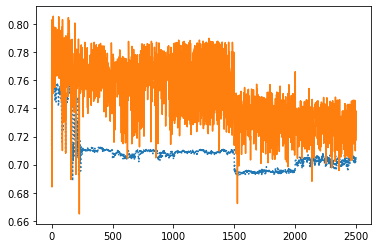

In [19]:
plt.plot(valid['acc'], ':')
plt.plot(valid['val_acc']);

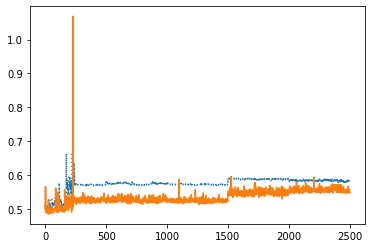

In [20]:
plt.plot(valid['loss'], ':')
plt.plot(valid['val_loss']);

In [23]:
weights = []
for layer in model.layers:
    weights.append(layer.get_weights())

In [27]:
weights[1][0]

array([[ 8.87641966e-01,  1.84585541e-01,  3.46016616e-01,
         2.16091618e-01,  2.30283785e+00,  1.03436077e+00,
        -1.27165258e+00,  1.51299655e-01,  7.31348217e-01,
        -1.70104980e-01,  6.41137809e-02,  2.72816181e+00,
         1.40238786e+00,  1.63452435e+00,  5.03545761e-01,
         7.47166574e-02, -1.29573178e+00,  9.80592519e-02,
        -1.49307394e+00,  1.18363094e+00,  1.39600837e+00,
        -3.99778783e-01,  1.51164126e+00,  1.18621178e-01,
         2.45623970e+00,  6.32204533e-01,  9.24459875e-01,
         2.10830688e+00,  6.38827443e-01,  1.45231295e+00,
         1.78674553e-02,  9.96424496e-01,  1.09857595e+00,
        -1.09531927e+00,  1.12442926e-01, -9.41339612e-01,
         1.22939670e+00,  1.58086276e+00,  1.46061146e+00,
        -1.48400438e+00,  1.14843953e+00,  1.09212184e+00,
         2.12109661e+00, -1.07422578e+00,  2.08680391e+00,
         1.38000298e+00,  1.98864114e+00,  2.08705568e+00,
         4.36388731e+00,  4.45793450e-01, -2.96782911e-0

In [20]:
from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70, input_length=False):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        if input_length:
            self.input_length = input_length
        super().__init__()

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        current_length = len(opponent.history)
        history = [action.value for action in opponent.history]

        prediction = self.model.predict(self.reshape_history_function(history, self.input_length))
    

        return axl.Action(round(prediction.max()))

    def __repr__(self):
        return self.name

In [21]:
def reshape_history_padded_model(history, input_length):

    length_history = len(history)
    history = np.where(np.array(history)==0, 2, history)
    
    if length_history > input_length:
        inputs = np.array(history[-input_length:])
    else:
        inputs = np.append(history, np.zeros((input_length - length_history, 1)))
    
    assert len(inputs) == input_length
    
    return np.array(inputs).reshape(1, len(inputs))

**Match**

In [22]:
player = LSTMPlayer(model, reshape_history_padded_model, input_length=204)

In [23]:
match = axl.Match([player, axl.Grudger()], turns=205)

In [24]:
_ = match.play()

In [25]:
match.result

[(C, C),
 (D, C),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (C, D),
 (C, D),
 